<a href="https://colab.research.google.com/github/elinteerie/Models/blob/main/Pytorch_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets

In [11]:
!wget https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip?raw=true

--2022-08-22 08:56:39--  https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip [following]
--2022-08-22 08:56:40--  https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi.zip [following]
--2022-08-22 08:56:40--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/pizza_steak_sushi.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.git

In [106]:
import zipfile
import os

In [107]:
img_dir ='/content/pizza_steak_sushi.zip?raw=true'

In [325]:
zip = zipfile.ZipFile(img_dir, 'r')
zip.extractall()
zip.close()

IsADirectoryError: ignored

In [390]:
train_dir = '/content/train/'
test_dir = '/content/test/'

In [327]:
import pathlib
from pathlib import Path

In [392]:
img_dir =  Path(train_dir)

In [330]:
img_dir

PosixPath('/content/train')

In [331]:
img_dir_images = (list(img_dir.glob('**/*.jpg')))


In [332]:
len(img_dir_images)

225

In [291]:
img_dir[100]

PosixPath('/content/train/steak/231296.jpg')

In [294]:
img_label = pathlib.PurePosixPath(str(img_dir[100])).parent.stem

In [295]:
img_label

'steak'

In [240]:
(list(p.glob('**/*.jpg')))[2]

PosixPath('/content/train/sushi/2019344.jpg')

In [192]:
img = read_image(str(sample_img))

In [193]:
img.shape

torch.Size([3, 287, 512])

In [119]:
p.glob('**/')

<generator object Path.glob at 0x7ff59b7431d0>

In [194]:
print(list(p.glob('*/*.jpg')))
(list(p.glob('*/*.jpg')))[2]
Path(str(sample_img))

[PosixPath('/content/train/sushi/307738.jpg'), PosixPath('/content/train/sushi/1129338.jpg'), PosixPath('/content/train/sushi/2019344.jpg'), PosixPath('/content/train/sushi/2641778.jpg'), PosixPath('/content/train/sushi/1551817.jpg'), PosixPath('/content/train/sushi/710379.jpg'), PosixPath('/content/train/sushi/2574453.jpg'), PosixPath('/content/train/sushi/1575445.jpg'), PosixPath('/content/train/sushi/2175561.jpg'), PosixPath('/content/train/sushi/2021381.jpg'), PosixPath('/content/train/sushi/424994.jpg'), PosixPath('/content/train/sushi/1070104.jpg'), PosixPath('/content/train/sushi/929471.jpg'), PosixPath('/content/train/sushi/2120573.jpg'), PosixPath('/content/train/sushi/2980779.jpg'), PosixPath('/content/train/sushi/2267190.jpg'), PosixPath('/content/train/sushi/2813454.jpg'), PosixPath('/content/train/sushi/169392.jpg'), PosixPath('/content/train/sushi/170385.jpg'), PosixPath('/content/train/sushi/121940.jpg'), PosixPath('/content/train/sushi/765684.jpg'), PosixPath('/content/

PosixPath('/content/train/sushi/2019344.jpg')

In [205]:
q = str(pathlib.PurePosixPath(sample_img).stem)

In [206]:
q

'2019344'

In [297]:
from torchvision.io import read_image
img = read_image(str(img_dir[100]))

In [299]:
img.shape

torch.Size([3, 382, 512])

In [300]:
len(img_dir)

225

In [451]:
from torch import nn
tran = nn.Sequential(
            T.Resize([192, 256]), 
            T.ConvertImageDtype(torch.float),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        )

In [452]:
tran

Sequential(
  (0): Resize(size=[192, 256], interpolation=bilinear, max_size=None, antialias=None)
  (1): ConvertImageDtype()
  (2): Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [474]:
from torchvision.transforms import ToTensor
from torchvision import transforms as T




class PizzaImages(Dataset):

  def __init__(self, img_dir):
    self.img_dir = (list(img_dir.glob('**/*.jpg')))


  def __len__(self):
    return len(self.img_dir)


  def __getitem__(self, idx):
    each = str(self.img_dir[idx])
    label = pathlib.PurePosixPath(str(each)).parent.stem
    image = read_image(each)
    image = T.Resize([224, 224])(image)
    return image, label



In [453]:
T.Resize([224, 224])

Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=None)

In [406]:
a = str(img_dir[1])

TypeError: ignored

In [ ]:
read_im

In [455]:
train_images = PizzaImages(img_dir)

In [456]:
train_images

In [457]:
len(train_images)

225

In [458]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_images, batch_size=64, shuffle=True)

In [459]:
train_dataloader

In [460]:
train_features, train_labels = next(iter(train_dataloader))

Feature batch shape: torch.Size([64, 3, 224, 224])


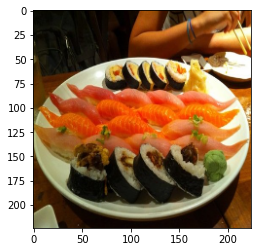

Label: sushi


In [529]:
import matplotlib.pyplot as plt

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}")
img = train_features[50].permute(1, 2, 0)
label = train_labels[50]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [522]:
img = train_features[0].permute(1, 2, 0)


In [524]:
img.shape

torch.Size([224, 224, 3])

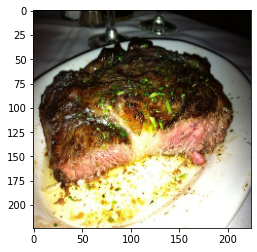

In [525]:
plt.imshow(img)
plt.show()